In [ ]:
import pandas as pd
import numpy as np

**First read the file and create a dataframe**

In [ ]:

df=pd.read_csv('/content/placemet.csv')


***Now, use the head function to get the first five rows***

In [ ]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


**Now, check the total number of students in the dataset. The shape attribute tells us the total number of students.**

In [ ]:
df.shape

(100, 4)

# **Steps**
1.   Preprocessing
2.   EDA
3.   Feature engineering and feature selection
4.   extract input or output cols
5.   scale the values
6.   train test split
7.   train the model
8.   Evaluate the model and model selection
9.   Deploy the model





# **Preprocessing**

1. In preprocessing first step is to **remove the missing values**.
2. The **second step is imputation**, those null values which are important in prediction of the model are not removed. These values fill with median, mode and mean.
3. The **third step** is to remove the **outliers** in the dataset. The outliers are those values which are far away from the datapoints. 
4. The **fourth setup** is remove the those features which has higher dimensionality. To reduce the dimensions of the features use the PCA **(Principle Component Analysis).**
5. The fifth setup is **standarization** the data and ensure that all the input features are on the same scale before giving them to the machine learning models.
6. The six step is **normalization** Data that is present in a different scale can be problematic as we have seen in the above case. we are subtracting the present value from the minimum value in a particular feature and we divide the result with the difference between the maximum value and the minimum value in the feature of interest. 
7. **Binning It is important** to address the outliers present in the data that impact the performance of machine learning models. One of the ways to reduce the impact of these outliers is to divide the datapoints into various bins based on an important feature.
8. **Clusting**, Whenever we are dealing with unsupervised machine learning where the output or the target variable is not known, one of the popular approaches with this data is clustering. While clustering can be used for unsupervised machine learning, it can also be used for supervised machine learning as well.



### **Remove the irrelevant feature. The iloc gets dataframe rows and columns by integer/index position. If the position is not present it gives an error.**

In [ ]:
df=df.iloc[:, 1:]

In [ ]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


### **Info function prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    int64  
 2   Placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


**Describe function returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count. The number of not-empty values. mean - The average (mean) value.**

In [ ]:
df.describe()

,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# **EDA**

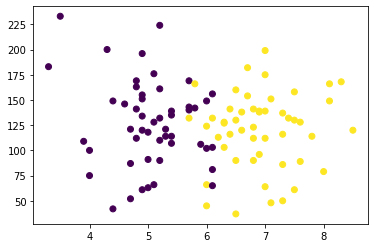

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'], df['IQ'], c=df['Placement'])
plt.show()

In [ ]:
#Now separete the input and output columns
independent_features=df.iloc[:, :2]
TargetVariable=df['Placement']

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(independent_features, TargetVariable, test_size=0.1)

# Feature scaling is good pratice beacuse some values in the features are far away. All the features make on the same scale. Now, we will apply the feature sacaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)


In [ ]:
X_train

array([[ 0.84593981, -0.66335021],
       [-1.35958113,  0.65177053],
       [ 0.84593981,  0.40363454],
       [ 0.93416065, -1.45738536],
       [-1.35958113, -2.00328454],
       [-1.09491862, -0.88667259],
       [ 0.49305646,  0.18031215],
       [ 1.19882316, -0.16707823],
       [ 0.5812773 ,  0.37882094],
       [-0.91847694,  0.80065212],
       [ 0.49305646, -2.12735253],
       [ 1.90458986,  0.65177053],
       [-0.21271024,  0.50288893],
       [-0.47737276,  0.40363454],
       [-0.91847694,  0.27956655],
       [ 0.05195227, -1.40775817],
       [ 0.14017311,  0.22993935],
       [-0.47737276, -0.21670543],
       [-1.71246448, -0.56409581],
       [ 1.02238149,  0.70139772],
       [-0.65381443,  2.51279043],
       [ 0.14017311, -0.48965501],
       [ 0.75771897, -0.26633263],
       [-0.83025611, -0.7874182 ],
       [-1.44780197,  1.91726406],
       [-1.00669778,  0.45326174],
       [-0.91847694, -0.06782384],
       [ 1.19882316, -1.80477575],
       [ 0.49305646,

In [ ]:
X_test=st.transform(X_test)

In [ ]:
X_test

array([[ 1.37526484,  0.18031215],
       [-0.74203527,  1.32173769],
       [ 0.22839395, -0.24151903],
       [ 1.19882316, -0.91148619],
       [ 1.37526484,  0.87509291],
       [ 1.19882316,  0.35400734],
       [-0.74203527, -1.40775817],
       [ 1.46348567,  0.13068495],
       [ 0.05195227,  0.65177053],
       [-1.00669778,  1.1480425 ]])

In [ ]:
# train the model using logistic regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

# Now, Evaluate the model after training the model.

In [ ]:
Y_predict=LR.predict(X_test)

In [ ]:
Y_test

83    1
15    0
99    1
90    1
91    1
61    1
9     0
30    1
33    0
75    0
Name: Placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.9

In [ ]:
# Now we use pickle library which process of converting a Python object into a byte stream to store it in a file/database
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(plt.clf, f)